# Assessment 1

The aim of this assessment is, given a dataset containing internet traffic, to predict normal v.s abnormal traffic using a portion of the data for training, and the rest for testing. The original data can be found [here](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html).

## Methodology

1) The dataset was split in data used for training and data used for testing. The method used was k-fold Cross Validation (k-fold CV) for chosen k=10. This way, all project participants were ensured to be both training and testing on the same data, although free to manipulate it in between as needed. Exact instructions on how the folding was done can be found [here](https://github.com/Galeforse/DST-Assessment-01/blob/main/Data/Instructions%20on%20folding.ipynb).

**IMPORTANT:** There is absolutely no need to repeat the process described in the link above. Instead, the training data obtained which we'll be using throughout this analysis is [found here: Training Set](https://github.com/Galeforse/DST-Assessment-01/blob/main/Data/kd_train.csv.zip); and the rest of 10% of the data which we'll use for testing is [found here: Testing Set](https://github.com/Galeforse/DST-Assessment-01/blob/main/Data/kd_test.csv.zip) .

2) The training data was thoroughly studied with a main focus on its abornmal traffic exhibited, patterns and occurences. Techniques used in this training phase to obtain a better grasp of the dataset include correlation checks, covariances, linear regressions, function manipulations, visual representations etc. These will all be explained as we progress through the analysis.

3) After sufficient training has been done to gain a good understanding of the dataset, a model is chosen to approach the predictions. Our first attempt is a naive one, from which we, however, learn some important facts surrounding the data. Our second attempt represents our model: KNN analysis - K-nearest neighbours, for chosen K=1. 

4) We conclude the analysis with our resulted predictions, as well as consistency checks, sanity checks, notes and observations. 

The reader is asked to load the following packages before proceeding with any of the rest of the code, as they'll be needed for our implementation.
The 'commented' __##__ part should be 'uncommented' if the user has not before installed the packages. Otherwise, they only need loading with the library() function.

In [ ]:
library(ggplot2) # install.packages("ggplot2")	## Optional - should get automatically installed via installation of "caret"
library(caret) # install.packages("caret")
library(e1071) # install.packages("e1071")
library(knitr) # install.packages("knitr")
library(class) # install.packages("class")
library(stats) # install.packages("stats")

If the user followed the **Methodology** above, they should by now have downloaded 2 files: one named *kd_train.csv* and the other *kd_test.csv* . If they haven't, they're asked to do so referring to the start of the page.
Once that step is complete, find where your files have been saved and change the set working directory accordingly. Not doing so may result in problems loading the data.

## Loading and Manipulation of the data
Let's load the data:

In [ ]:
# setwd("D://R-4.0.2//ExcelWorks")
kd <- read.csv(file = "kd_train.csv", header = T) ## The training dataset
kt <- read.csv(file = "kd_test.csv", header = T)  ## The testing dataset
head(kd) 

Two things stick out: The 1st and the last columns(features). The 1st one is an indicator of all datapoints, however it's shuffled. That is intentional, and the reason for that is made clearer in the first link at the top.
The last column indicates how we've folded our dataset. These partitions will prove to be useful, so we'll create 9 separate folds based on them, called kd1 through kd9.

In [ ]:
# unique(kd$folds) - We've partitioned it into 9 folds
kd1 <- kd[kd$folds== 1, ]
kd2 <- kd[kd$folds== 2, ]
kd3 <- kd[kd$folds== 3, ]
kd4 <- kd[kd$folds== 4, ]
kd5 <- kd[kd$folds== 5, ]
kd6 <- kd[kd$folds== 6, ]
kd7 <- kd[kd$folds== 7, ]
kd8 <- kd[kd$folds== 8, ]
kd9 <- kd[kd$folds== 9, ]

As we go, we'll implement a couple of functions - some very simplistic and others more needy. These will be shown in the order they're needed, so the user can copy-paste the code in its entirety into their terminal -- but a list of all functions used is found [here](https://github.com/Galeforse/DST-Assessment-01/blob/main/Alex%20Caian/Functions_Used).
We'll use these following processes a lot, so let's implement them:

In [ ]:
undone <- function(x) {
	n <- ncol(x)
	if (class(x) == "data.frame") { x <- x[, -n] }
	}
	## This function removes the folds col we no longer need
undone.all <- function(x, ...) {
	x <- undone(x)
	invisible(x)	}

We now have our datasets, so we can remove the unwanted folds column.

In [ ]:
kd1 <- undone(kd1)
kd2 <- undone(kd2)
kd3 <- undone(kd3)
kd4 <- undone(kd4)
kd5 <- undone(kd5)
kd6 <- undone(kd6)
kd7 <- undone(kd7)
kd8 <- undone(kd8)
kd9 <- undone(kd9)	## We removed all 'folds'

head(kd1)

We're quite possibly, above all, interested in how each fold handles the normal v.s anomalous traffic individually. We will look into that:

In [ ]:
labels <- function(x, n = ncol(x)) {
	t <- as.data.frame(table(x[,n]))
			 }	## Checks all behaviour 

ld1 <- labels(kd1)
ld2 <- labels(kd2)
ld3 <- labels(kd3)
ld4 <- labels(kd4)
ld5 <- labels(kd5)
ld6 <- labels(kd6)
ld7 <- labels(kd7)
ld8 <- labels(kd8)
ld9 <- labels(kd9) # We portray the appearances of each individual attack within each individual fold.

ld1
ld2
ld3
ld4
ld5
ld6
ld7
ld8
ld9

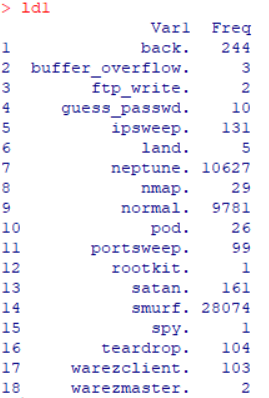
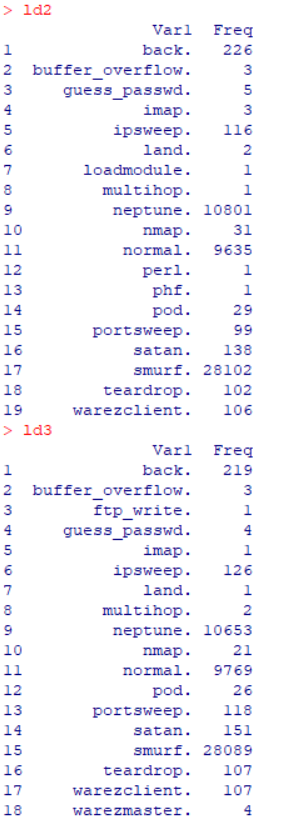
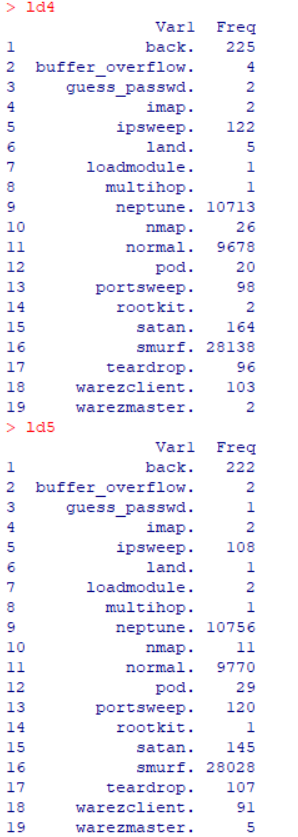
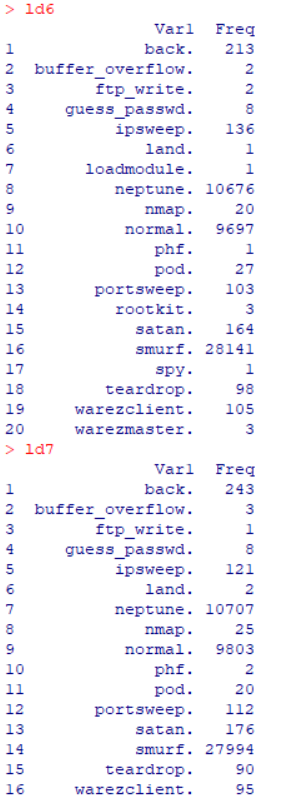
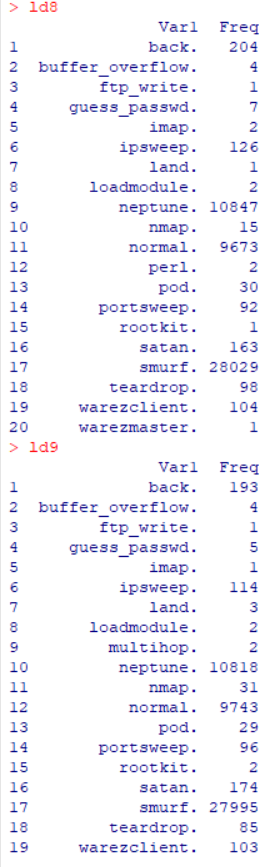

We'll obtain a nicer visualisation with the aid of charts:

In [ ]:
# png(file = "Folded_Attacks_Visualisation.png")
op <- par(mfrow = c(3,3))
	pie(ld1$Freq, labels = ld1[,1], col = rainbow(20))
	pie(ld2$Freq, labels = ld2[,1], col = rainbow(20))
	pie(ld3$Freq, labels = ld3[,1], col = rainbow(20))
	pie(ld4$Freq, labels = ld4[,1], col = rainbow(20))
	pie(ld5$Freq, labels = ld5[,1], col = rainbow(20))
	pie(ld6$Freq, labels = ld6[,1], col = rainbow(20))
	pie(ld7$Freq, labels = ld7[,1], col = rainbow(20))
	pie(ld8$Freq, labels = ld8[,1], col = rainbow(20))
	pie(ld9$Freq, labels = ld9[,1], col = rainbow(20))
par(op)
# dev.off()

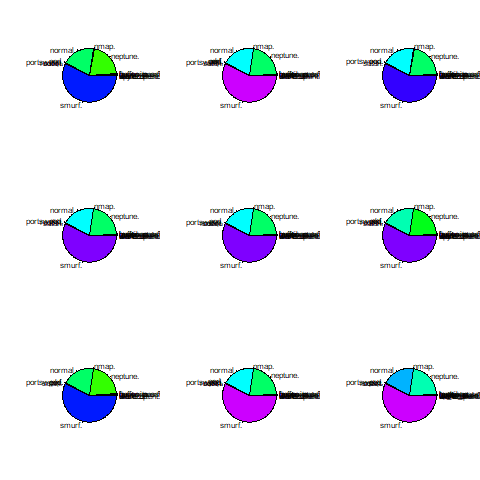

What we observe both from the raw data and from the piecharts is that the folds have very similar distributions of the attacks as well as normal traffic. Consistently, normal behaviour renders ~ 20% of the whole data, similar to the _neptune_ attack; whereas the _smurf_ attack occurs over 58% of the time - and all other types of abnormal traffic all sum to ~2-3% of the whole dataset. This behaviour is consistent on all 9 of our datasets, which were arbitrarily folded (randomness guaranteed by our initial shuffle) - which very strongly indicates a pattern in our whole initial data - so a potential route for predicting how the remaining 10% of our data; the test set, will behave.

Let's now focus our attention towards a different data manipulation:

In [ ]:
nor <-function(x) { (x -min(x))/(max(x)-min(x))   } 	## Our normalization function

Freq <- function(x) {
	n <- ncol(x)
	if (class(x) == "data.frame") {
		labs <- tapply(x[,n] , x[,n])
		x <- cbind(x,labs)		
		l <- length(unique(x$labs)) 
		}
		x		## This function attaches a numerical value to the attacks
		}		## Once no longer needed, can be undone with our undone() function

kd1 <- Freq(kd1)
kd2 <- Freq(kd2)
kd3 <- Freq(kd3)
kd3 <- Freq(kd3)
kd4 <- Freq(kd4)
kd5 <- Freq(kd5)
kd6 <- Freq(kd6)
kd7 <- Freq(kd7)
kd8 <- Freq(kd8)
kd9 <- Freq(kd9) # We now attach their unique numerology

head(kd1) # Testing it works - last column should be a numbering of the behaviour

## The following function creates a covariance matrix
Covs <- function(x) {
	if(class(x)!="data.frame") {
		stop("Please input a data frame!") }
v1<- cbind(as.numeric(x$labs), as.numeric(x$count), x$diff_srv_rate)   # Chosen relevant, numerical values
v1<- as.data.frame(v1)                                                 # to ensure our function runs.
colnames(v1)<- c("labs", "count", "srv_rate")
v1<- nor(v1)		## Want normalized data
cov(v1) }

Another way we'll be interpreting data is via a covariance matrix, in order to check how our "labs", and implicitly our traffic behaves in variance with the _server count_ and the _server rate_. This will determine whether the two (and other features exhibiting similar behaviour, if that's the case) are worth considering for making good predictions, or if they can be dropped. As we'll see, we cleverely picked good indicators:

In [ ]:
Covs(kd1)
Covs(kd2)
Covs(kd3)
Covs(kd4)
Covs(kd5)
Covs(kd6)
Covs(kd7)
Covs(kd8)
Covs(kd9)

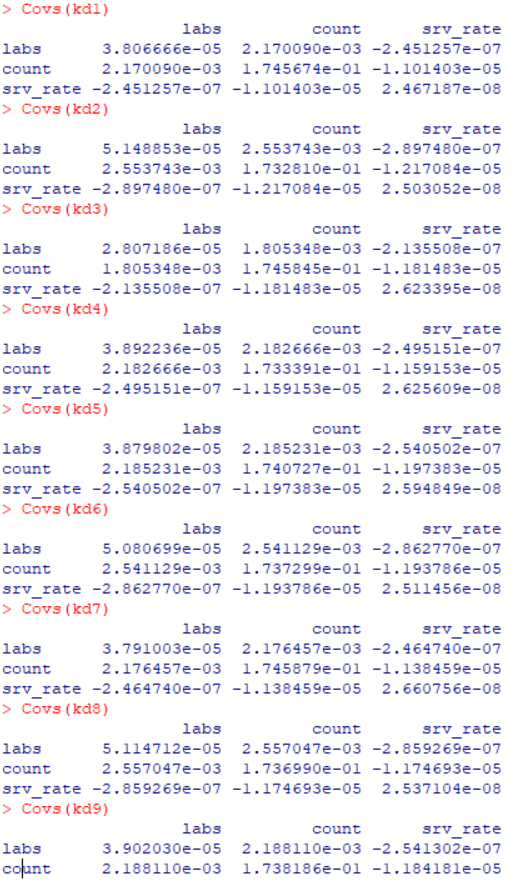

Indeed, there's some evident direct and inverse proportionality between our 3 features. This result, combined with the charts above, strongly suggest that we should obtain good predictions testing on precisely these features, as well as similar ones (such as server_rerror_rate etc.)

Now to apply it to the whole dataset:

In [ ]:
kd <- undone(kd)
kd <- Freq(kd)		## labs == 12 corresponds to label == "normal."
ld <- labels(kd, n = (ncol(kd)-1))
# png(file = "All_attacks_Visualisation.png")
pie(ld$Freq, labels = ld[,1], col = rainbow(23),
main = "Visualisation of all behaviour")
# dev.off()

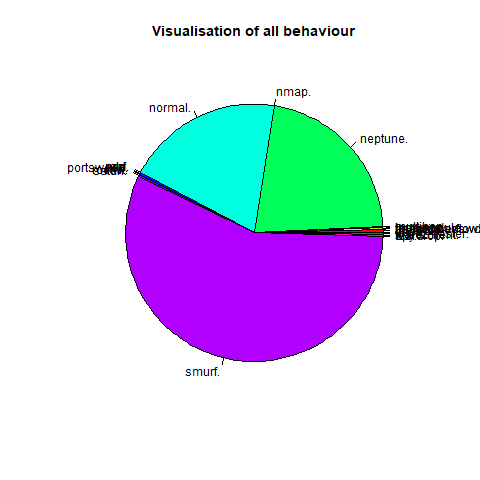

In [ ]:
Covs(kd)

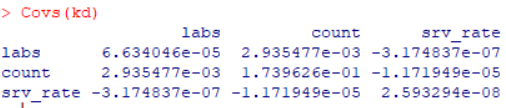

As expected - the general consensus is that our training data is uniformly distributed with pattern following the chart above and co-variance of (relevant) features following the result above. We have strong reasons to believe the test set will follow these proportions.

What we still lack is an established batch of features to work on. Two features alongside our traffic are insufficient for conclusive analysis. We aim to find more by checking correlations with the traffic among other possible candidates for relevant features:

In [ ]:
training <- as.vector(as.numeric(kd$labs)) # This will be our training set

## Checking correlations##
cor(kd$dst_host_srv_count, training)	# Strong correlation ~ 74%
cor(kd$dst_host_count, training)	# Weak correlation ~ 30%
cor(kd$srv_count, training)	# Really strong correlation ~ 95%
cor(kd$count, training)		# Strong correlation ~ 86%

## We will pick the ones with strong correlations
m1 <- lm(kd$dst_host_srv_count ~ training, data = kd)
m2 <- lm(kd$srv_count ~ training, data = kd)
m3 <- lm(kd$count ~ training, data = kd)

Based on these correlations, we may predict the behaviour of testing as being consistent with the good correlations: m1,m2 and m3 => indicative of what we might expect.

Given how many kinds of anomalies our dataset exhibits, it would be difficult to individually work on each of them. Instead, we will from now on simply denote all normal traffic by '1', and all malicious activity by '0'.

In [ ]:
Behaviour <- vector(length = nrow(kd))
for(i in 1:nrow(kd)) {
	if(kd$label[i]== "normal.") {
		Behaviour[i] <- 1 }
	if(kd$label[i]!= "normal.") {
		Behaviour[i] <- 0 }
	}

kd <- undone(kd)
kd <- cbind(kd, Behaviour)

tt <- table(kd$Behaviour)
# png(file = "Norm_vs_Abnorm.png")
pie(tt, label = c("Anomalies", "Normal Behaviour"))
# dev.off()

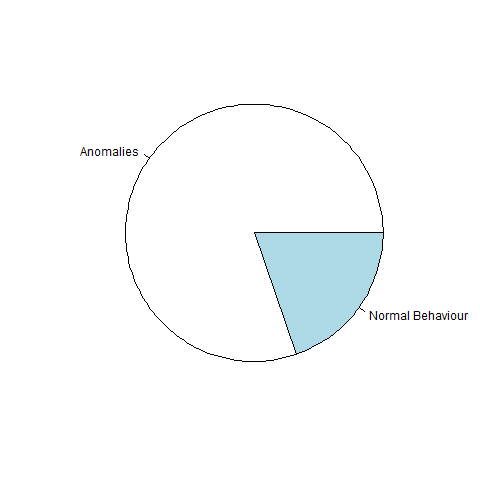

In [ ]:
## We can now run the same tests as before for consistency:

cor(kd$dst_host_srv_count, Behaviour)	
cor(kd$dst_host_count, Behaviour)
cor(kd$srv_count, Behaviour)	## All inversely correlated results results < 0.00 [negative] ## Except first one, which shows no correlation
cor(kd$count, Behaviour) # -75%; partially strong inverse correlation

We're left to also check the covariance between all features in the whole training data, like we did for the folds, and conclude which of those will be relevant for prediction. We can't test over all of them, since they must be numeric variables. 
Will extract the numeric ones, and pay particular attention to the covariance between the _Behaviour_ and the rest of the datapoints.

In [ ]:
kdc<- kd[, 26:42] # Extracting only the nums
C<- cov(kdc)
kdc<- cbind(kdc, Behaviour)
C2<- cov(kdc)   ## For $Behaviour
		# dst_host_same_src_port_rate shows inverse proportionality of -9.21
		# dst_host_rerror_rate shows inverse proportionality of -9.41
		# dst_host_diff_srv_rate shows direct proportionality of 5.02
		# diff_srv_rate shows inverse proportionality of -5.36
# png(file="Behav_Cov.png")
barplot(C2[,18],ylim=c(-20,20), main = "Covariance of Behaviour")
# dev.off()

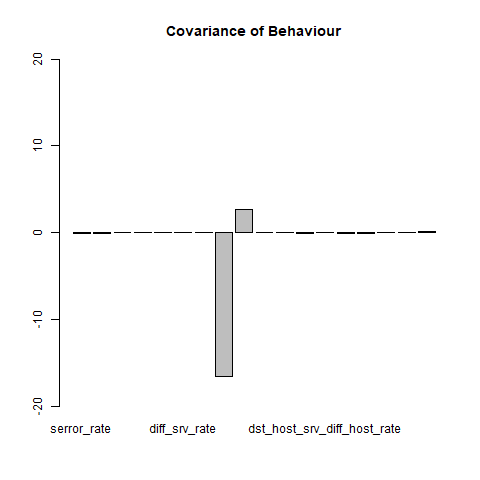

We now have sufficient conclusions to start testing. 
We have discovered a few things:

A) Which features will be relevant for creating predictions, based on their responses to the traffic.

B) What to 'intuitively' expect the test data will look like - evident patterns among the 9 folds; coherent with the whole dataset.

C) Normal traffic's propoensity and presence in the data (~ 20%)

## Test data analysis and Testing

Before we get to the actual testing, we will present a 'spoiler' of our expected results - by computing the same covariance and plotting it just the way we did for the training data. If we get a similar plot, then all our assumptions A - C were correct. Otherwise, we'd have serious concerns regarding our model selection and the behaviour we predicted for the data.

In [ ]:
rm(Behaviour) # Use it to attach to the testing set now this time
Behaviour<- vector(length=nrow(kt))
	for(i in 1:nrow(kt)) {
		if(kt$label[i]=="normal.") {
			Behaviour[i]<- 1 }
		if(kt$label[i]!="normal.") {
			Behaviour[i]<- 0 }
		}
kt<- cbind(kt, Behaviour)    ## We had to do this any way.

## Sanity check ##
rm(C)
rm(C2)
ktc <- kt[, 26:42]
C <- cov(ktc)
ktc<- cbind(ktc, Behaviour)
C2<- cov(ktc)	## For $Behaviour
		# dst_host_same_src_port_rate shows inverse proportionality of -9.25
		# dst_host_rerror_rate shows direct proportionality of 5.83 ## Only major difference
		# dst_host_diff_srv_rate shows direct proportionality of 5.12
		# diff_srv_rate shows inverse proportionality of -5.71
## They all still show high levels of covariance => Makes sense
## to apply the knn on this partition of our data

# png(file="Behav_Cov_test.png")
barplot(C2[,19],ylim=c(-20,20), main = "Covariance of Behaviour")
# dev.off()
	## Similar result as in the training dataset

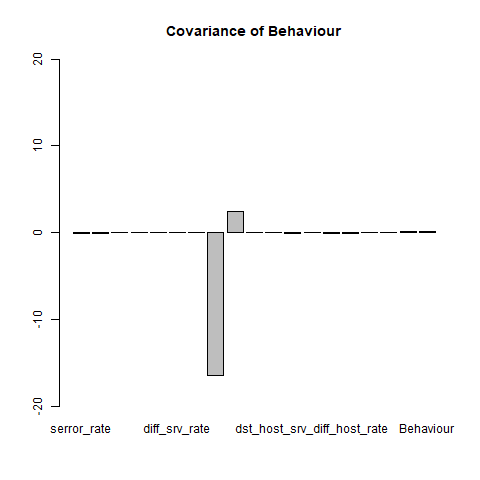

Indeed, we got similar results so we can safely proceed. We won't make any further use of this small spoiler as we get to testing. 

## Test #1 [Very Naive]

We might be tempted to rely too much on the uniform results concluded through our training. This leads us to our first method:

We aim to fully trust the even distribution of normal v.s abnormal traffic in the training set to be mimicked in the test set. This will prove to be _TRUE_. However, as we will see, this remark on its own is far insufficient to predict the _order of how traffic is transmitted_; although it will essentially predict the fraction of normal traffic in the whole test data.

We will sample various predictions of potential sequences of traffic, and then compare them to the test data of the actual traffic. If compared at face value, i.e. proportion of normal traffic/total traffic we will get very similar results. If compared on prediction of transmission, we will fail. 

**Note**: This is in no way related to Monte-Carlo testing. We're not shuffling our test data among them and trying to pick it out. We're creating fake datas and seeing how little they really resemble the real data. The reason is obvious: this approach isn't a model per se. It's merely a method of randomly "maybe-we'll-get-lucky" sampling traffic outcomes.

In [ ]:
q <- sum(tt)
q1 <- as.numeric(tt[1]/q) # Percentage of 0's
q2 <- as.numeric(tt[2]/q) # Percentage of 1's

# kt <- read.csv(file = "kd_test.csv", header = T) ## Recall this was our testing set
# kt<- cbind(kt, Behaviour) ## To it we attached the traffic normal v.s abnormal

set.seed(12)
s1<- sample(c(0,1), replace = TRUE, size = nrow(kt), prob=c(q1, q2))
s2<- sample(c(0,1), replace = TRUE, size = nrow(kt), prob=c(q1, q2))
s3<- sample(c(0,1), replace = TRUE, size = nrow(kt), prob=c(q1, q2))
s4<- sample(c(0,1), replace = TRUE, size = nrow(kt), prob=c(q1, q2))
s5<- sample(c(0,1), replace = TRUE, size = nrow(kt), prob=c(q1, q2))
s6<- sample(c(0,1), replace = TRUE, size = nrow(kt), prob=c(q1, q2))
s7<- sample(c(0,1), replace = TRUE, size = nrow(kt), prob=c(q1, q2))
s8<- sample(c(0,1), replace = TRUE, size = nrow(kt), prob=c(q1, q2))
s9<- sample(c(0,1), replace = TRUE, size = nrow(kt), prob=c(q1, q2))
s10<- sample(c(0,1), replace = TRUE, size = nrow(kt), prob=c(q1, q2))
        ## 10 samples of potential outcomes
# Note: Whoever runs this code will obviously get different results, as the samples are purely random.
	# They shouldn't, however, differ by much, and the main point of this code remains the same.

behaviour <- vector(length = nrow(kt))
for(i in 1:nrow(kt)) {
	if(kt$label[i]== "normal.") {
		behaviour[i] <- 1 }
	if(kt$label[i]!= "normal.") {
		behaviour[i] <- 0 }
	}
sum(behaviour)/nrow(kt)   # We get 0.196 ~ i.e. around 19.6% of the traffic is normal

SL <- function(x, ...) {
	y<- sum(x)/length(x)
	y }

SL(s1) # 0.195 [First attempt]
SL(s2) # 0.197 [Second attempt]
SL(s3) # 0.195 [Third attempt]
SL(s4) # 0.195 [4th attempt]
SL(s5) # 0.198 [5th attempt]
SL(s6) # 0.197 [6th attempt]
SL(s7) # 0.197 [7th attempt]
SL(s8) # 0.197 [8th attempt]
SL(s9) # 0.197 [9th attempt]
SL(s10) # 0.200 [10th attempt]	## All pretty close. With a margin of error of +/- 0.005 they'd all pass.
    ## Again, due to randomness, the results may differ

What we got so far is that in the testing dataset: ~ 19.6% of the traffic exhibits normal behaviour. In our sample tests, between 19.5 and 20% of the traffic exhibits normal behaviour. So far, this looks like a promising analysis.

However, we have to recall that we don't merely care about an educated guess of the proportions. Let us compare the samples per se with the test data.

In [ ]:
count <- function(s= s1, n=behaviour) {
	c <- 0
	if(length(s)!= length(n)) {
		stop("Lengths differ!") }
	else
	for(i in 1:length(s)) {
		if(s[i]==n[i]) { c<- c+1 }
			}
	print("The accuracy of this test is:")
	acc <- c/(length(s))
	acc }          ## This function computes the accuracy of our samples

count(s1)
count(s2)
count(s3)
count(s4)
count(s5)
count(s6)
count(s7)
count(s8)
count(s9)    
count(s10)    ## All about ~ 68% accuracy

All results were above 0.68 (68% accuracy), but below 0.69 (69% accuracy).

**Conclusion of the method:**
Clearly, when simply comparing the percentage results we got an astonishingly close resemblance to the actual distribution of our test data.
This is a good and concise indication of the kind of distribution we're dealing with, i.e. that the testing fold is expected to mimic the distribution of our training dataset.
When trying to predict the behaviour of our test data in terms of the samples, we see however that the accuracy rates drop significantly to just above 68% in all cases.
This is by no means unexpected: we weren't hoping for any definitive results in our process. In fact, mathematically thinking, the result is very small: Seeing as roughly 20% of the data is normal and 80% corrupted, by the pidgeonhole principle at least 60% of the corrupted data will get assigned accordingly, since in the worst case scenario all the normal data gets assigned as corrupted, and consequently on the other side the 20% left of unassigned normal data is assigned from corrupted data => 100-40 = 60% of the corrupted data (zeroes) are assigned correctly with certainty. This means that out of 40% remaining cases (of the total), only 8%, meaning 8/40 = 20% of the free shifting data hit the mark. And that is by pure chance: No data manipulation was involved in this sense; it was just a coincidental assignment.
With this in mind, this exercise was **by no means** meant to showcase a model for prediction. Instead, it was a very naive first attempt at testing if the test data is behaving normally compared to our training set.
Our point was, indeed, reached by this experiment given the high amount of overlaps in the initial distributions, albeit the failure in our secondary obersvation. 

We can further illustrate this conclusion by running the confusion matrices for each sample:

In [ ]:
confusionMatrix(data=as.factor(s1),reference=as.factor(kt$Behaviour))
confusionMatrix(data=as.factor(s2),reference=as.factor(kt$Behaviour))
confusionMatrix(data=as.factor(s3),reference=as.factor(kt$Behaviour))
confusionMatrix(data=as.factor(s4),reference=as.factor(kt$Behaviour))
confusionMatrix(data=as.factor(s5),reference=as.factor(kt$Behaviour))
confusionMatrix(data=as.factor(s6),reference=as.factor(kt$Behaviour))
confusionMatrix(data=as.factor(s7),reference=as.factor(kt$Behaviour))
confusionMatrix(data=as.factor(s8),reference=as.factor(kt$Behaviour))
confusionMatrix(data=as.factor(s9),reference=as.factor(kt$Behaviour))
confusionMatrix(data=as.factor(s10),reference=as.factor(kt$Behaviour)) 

We will only illustrate one of the results, for the sake of not taking up too much space. The others are very similar nonetheless.
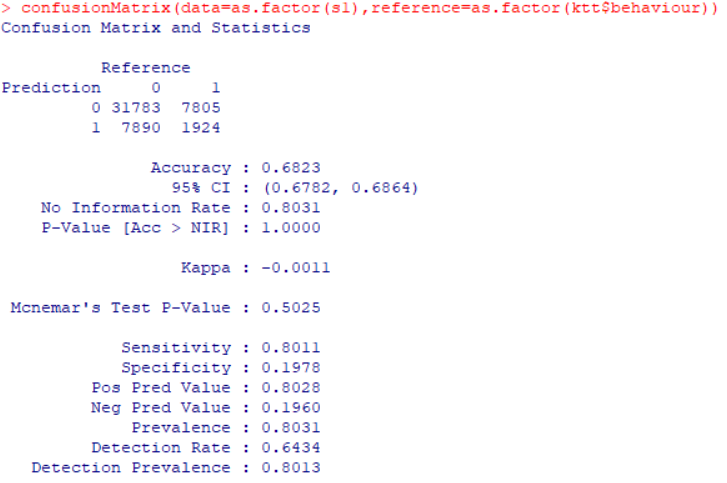

As expected, the accuracy given by the Confusion Matrix is 0.682, which is in our predicted range of 68% - 69% -- performing very poorly.

Let's get to our real model now.